# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt

import warnings
warnings.filterwarnings("ignore")

from pprint import pprint

In [2]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  19550 non-null  object 
 1   date     19550 non-null  object 
 2   prcp     18103 non-null  float64
 3   tobs     19550 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 611.1+ KB


In [4]:
# Convert the date column format from string to datetime
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  19550 non-null  object        
 1   date     19550 non-null  datetime64[ns]
 2   prcp     18103 non-null  float64       
 3   tobs     19550 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 611.1+ KB


In [5]:
# Set the date column as the DataFrame index
df = df.set_index(['date'])

In [6]:
# Drop the date column
df.head(10)

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
2010-01-07,USC00519397,0.06,70
2010-01-08,USC00519397,0.00,64
2010-01-09,USC00519397,0.00,68
2010-01-10,USC00519397,0.00,73


### Compare June and December data across all years 

In [7]:
from scipy import stats

In [8]:
# Filter data for desired months
June_data = df[df.index.month == 6]
Dec_data = df[df.index.month == 12]


In [9]:
# Identify the average temperature for June

average_temp_June = June_data.mean()["tobs"]
print(f"The average temperature for June: {average_temp_June:.2f}")

The average temperature for June: 74.94


In [10]:
# Identify the average temperature for December

average_temp_December = Dec_data.mean()["tobs"]
print(f"The average temperature for December: {average_temp_December:.2f}")

The average temperature for December: 71.04


In [11]:
# Create collections of temperature data

average_temp_June_Stationwise = June_data.groupby(["station"]).mean()["tobs"]
average_temp_Dec_Stationwise = Dec_data.groupby(["station"]).mean()["tobs"]

#merge stationwise average temperature for Jun and dec
stationwise_Jun_Dec_DF = pd.merge(average_temp_June_Stationwise, average_temp_Dec_Stationwise, on="station")

stationwise_Jun_Dec_DF

,tobs_x,tobs_y
station,,
USC00511918,74.139394,69.684211
USC00513117,74.050847,71.069444
USC00514830,76.005376,73.224719
USC00516128,71.937220,69.291262
USC00517948,76.655405,71.834862
USC00518838,73.394737,72.421053
USC00519281,73.271186,69.903226
USC00519397,77.559322,71.109524
USC00519523,76.668103,72.433333


In [12]:
#Rename columns tobs_x and tobs_y
stationwise_Jun_Dec_DF.rename(columns = {'tobs_x':'Avg Jun Temp','tobs_y':'Avg Dec Temp'}, inplace = True)
stationwise_Jun_Dec_DF

,Avg Jun Temp,Avg Dec Temp
station,,
USC00511918,74.139394,69.684211
USC00513117,74.050847,71.069444
USC00514830,76.005376,73.224719
USC00516128,71.937220,69.291262
USC00517948,76.655405,71.834862
USC00518838,73.394737,72.421053
USC00519281,73.271186,69.903226
USC00519397,77.559322,71.109524
USC00519523,76.668103,72.433333


In [13]:
# Run paired t-test
stats.ttest_rel(average_temp_June_Stationwise, average_temp_Dec_Stationwise)

Ttest_relResult(statistic=6.95696617044294, pvalue=0.00011759380231523222)

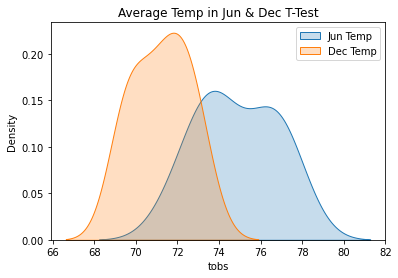

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(average_temp_June_Stationwise, shade=True, label ='Jun Temp')
sns.kdeplot(average_temp_Dec_Stationwise, shade=True, label ='Dec Temp')
plt.title("Average Temp in Jun & Dec T-Test")
plt.legend()

### Analysis

A paired t-test was used as we are comparing the mean temperatures for the same set of stations.

Hypothesis:
H0: It signifies that the mean June and December temperatures for stations are equal
HA: It signifies that the mean June and December temperatures for stations are not equal

Since the p-value (0.00012) is less than 0.05, we reject the null hypothesis that the mean for June and December temperatures are same. We have sufficient evidence to say that the true mean temperature for stations is different in June and December months.